<a href="https://colab.research.google.com/github/manshay-verma/detect-dummy-PAN_card/blob/main/pancard_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [2]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

In [3]:
original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', stream=True).raw)
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png',stream=True).raw)

In [4]:
print("Original image Format", original.format)
print("Tampered image Format", tampered.format)


print("Original image Size", original.size)
print("Tampered image Size", tampered.size)


Original image Format JPEG
Tampered image Format PNG
Original image Size (1200, 800)
Tampered image Size (282, 179)


In [5]:
# Resize Image
original = original.resize((250,160))
original.save('pan_card_tampering/image/original.png')
tampered = tampered.resize((250,160))
tampered.save('pan_card_tampering/image/tampered.png')

In [6]:
original = cv2.imread('pan_card_tampering/image/original.png')
tampered = cv2.imread('pan_card_tampering/image/tampered.png')

In [7]:
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

array([[254, 254, 254, ..., 252, 252, 254],
       [254, 254, 254, ..., 251, 251, 253],
       [254, 254, 250, ..., 238, 252, 252],
       ...,
       [253, 255, 250, ..., 236, 251, 252],
       [254, 253, 253, ..., 248, 253, 253],
       [255, 254, 254, ..., 253, 253, 250]], dtype=uint8)
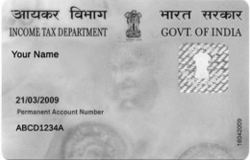

In [12]:
tampered_gray

In [8]:
(score, diff) = structural_similarity(original_gray,tampered_gray,full=True)
diff = (diff*255).astype('uint8')
print('SSIM: {}'.format(score))

SSIM: 0.31686135690489126
